In [20]:
import torch
import numpy
import random
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import sklearn
from sklearn import manifold, datasets

In [21]:
def lcp(strs):
    if len(strs) == 0:
        return ""
    current = strs[0]
    for i in range(1, len(strs)):
        temp = ""
        if len(current) == 0:
            break
        for j in range(len(strs[i])):
            if j < len(current) and current[j] == strs[i][j]:
                temp += current[j]
            else:
                break
        current = temp
    return current


def pairwise_distances(sequences):
    batch_size = sequences.shape[0]
    result = numpy.zeros(shape=(batch_size, batch_size))
    for i in range(batch_size):
        for j in range(i + 1):
            s1 = "".join(map(lambda x: str(x).strip("0"), sequences[i]))
            s2 = "".join(map(lambda x: str(x).strip("0"), sequences[j]))
            result[i, j] = result[j, i] =\
                len(s1) + len(s2) - 2 * len(lcp([s1, s2]))
    return result

In [22]:
class GroupDataset(Dataset):
    def __init__(self, sample_count, generators):
        self.sample_count = sample_count
        self.generators = generators

    def __len__(self):
        return self.sample_count

    def __getitem__(self, idx):
        length = max(1, int(numpy.random.poisson(lam=5.0)))
        sequence = [random.choice(list(range(1, 1 + 2 * self.generators)))]
        for _ in range(length - 1):
            sequence.append(random.choice(list(
                set(range(1, 1 + 2 * self.generators)) -
                set([1 + (sequence[-1] + 1) % 4])
            )))
        sequence = "".join(map(str, sequence))

        return list(map(int, list(sequence)))

In [23]:
sample_count = 100
steps = 30
generators = 2
group_dataset = GroupDataset(sample_count, generators)

In [24]:
dataset = [group_dataset.__getitem__(i) for i in range(50)]

In [25]:
dataset

[[4, 4, 1, 2],
 [3, 3, 2, 2, 1, 4],
 [1, 4, 4, 4, 3, 4],
 [4],
 [2, 1, 4, 4, 1, 2, 1],
 [4, 3, 4, 3, 3],
 [4, 3],
 [4, 1],
 [4, 1, 1, 1, 4],
 [1, 4, 4],
 [1, 4, 1, 2],
 [1, 2],
 [2, 2, 3],
 [3, 3, 4, 1, 1],
 [2, 1, 2, 2, 1],
 [4, 4, 1, 4, 3, 3],
 [2, 1, 2, 1, 1, 2, 3, 4, 1, 1],
 [4, 1, 2, 3, 3, 4],
 [1, 4, 1, 4, 1, 2, 1, 4, 4, 1, 4],
 [4, 3, 2, 3, 2, 3],
 [4, 1, 2, 1, 2, 2],
 [1],
 [2, 2, 1, 2, 1, 4, 1, 1],
 [4, 3, 4, 1, 4, 1, 2],
 [1, 4],
 [2, 1, 4, 3, 4, 1],
 [1, 2, 2],
 [3, 2, 1, 2, 2, 3],
 [3, 3],
 [2, 2, 3, 2, 3, 2, 1],
 [1, 4],
 [1, 4, 3, 4, 4],
 [1, 4, 4],
 [2, 3],
 [1, 2, 2],
 [4, 3],
 [1, 4, 3, 4],
 [1, 2],
 [1, 4, 1],
 [2, 1, 2, 1, 2, 3, 4, 1, 1, 4, 1],
 [3, 3, 3],
 [4, 3, 4, 4, 1],
 [2, 1, 4, 3, 3, 2, 2],
 [3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 1, 2, 1, 1],
 [4, 4, 3],
 [1, 2, 3, 2, 3, 3],
 [2, 3],
 [2, 1, 1, 2, 2],
 [4, 3],
 [2, 2, 3, 3, 2]]

In [26]:
Y = pairwise_distances(numpy.array(dataset))

<ipython-input-26-cc793f9c3b11>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Y = pairwise_distances(numpy.array(dataset))


In [27]:
Y

array([[ 0., 10., 10., ...,  9.,  4.,  9.],
       [10.,  0., 12., ..., 11.,  8., 11.],
       [10., 12.,  0., ..., 11.,  8., 11.],
       ...,
       [ 9., 11., 11., ...,  0.,  7.,  8.],
       [ 4.,  8.,  8., ...,  7.,  0.,  7.],
       [ 9., 11., 11., ...,  8.,  7.,  0.]])

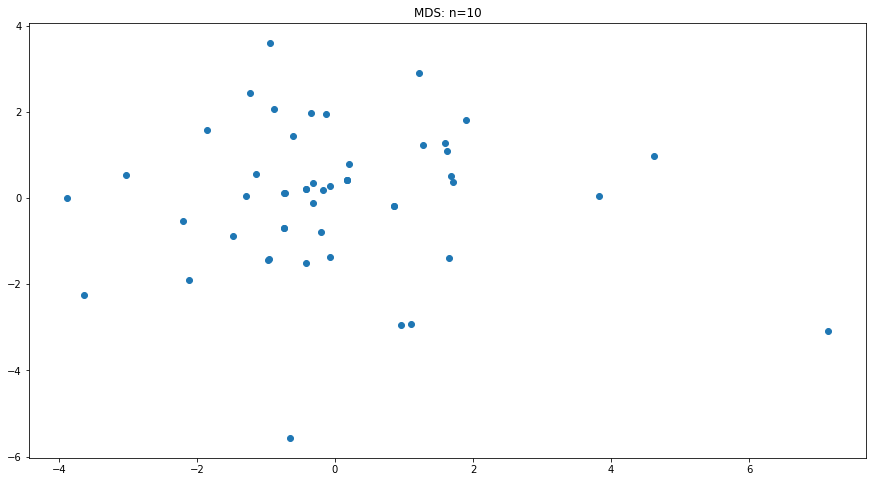

array([[-3.03152108e+00,  5.38569251e-01,  1.19078046e+00,
         3.77171696e-01, -1.42083346e+00,  3.26549513e-01,
         1.41290741e+00,  9.58382964e-01, -2.34724397e+00,
         2.16149860e+00],
       [-2.11817579e+00, -1.90931685e+00,  7.05774477e-01,
        -4.89611760e+00, -2.16515860e+00, -1.92672195e+00,
        -3.62249116e+00,  3.30490880e+00,  5.20718353e-01,
         2.44087580e-01],
       [-2.19773378e+00, -5.22251290e-01, -1.03137686e+00,
        -1.58142105e+00,  4.58013098e+00,  1.11062718e+00,
         2.39320047e+00,  2.23626700e+00,  2.02190164e+00,
        -2.53864107e+00],
       [-7.81510352e-02,  2.87667865e-01,  4.77089137e-01,
        -2.09427176e-01, -7.20166802e-01,  1.94636795e-01,
         5.94534057e-01,  6.85789556e-02, -4.53609839e-01,
         5.25002231e-01],
       [-1.85885625e+00,  1.56668267e+00, -3.91157952e+00,
         2.75823431e+00, -5.51426278e-01, -1.44452161e+00,
        -5.36554895e+00, -2.13790782e+00, -1.36570152e+00,
         2.

In [28]:
Axes3D

n_points = 100
n_neighbors = 10
n_components = 10

# Create figure
fig = plt.figure(figsize=(15, 8))

# Add 3d scatter plot

#ax.view_init(4, -72)

method = manifold.MDS(n_components, max_iter=100, n_init=1, dissimilarity= 'precomputed')

Y2 = method.fit_transform(Y)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Y2[:, 0], Y2[:, 1], cmap=plt.cm.Spectral)
ax.set_title(f"MDS: n={n_components}")
plt.show()

### Зависимость средних расстояний от размерности MDS

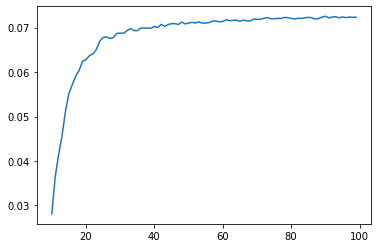

In [29]:
x = [i for i in range(10,100)]
y = []
for i in range(len(x)):
    method = manifold.MDS(x[i], max_iter=100, n_init=1, dissimilarity= 'precomputed')
    Y2 = method.fit_transform(Y)
    y.append(numpy.mean(sklearn.metrics.pairwise_distances(Y2) - Y))
plt.plot(x,y)
plt.show()

### Зависимость средних расстояний от кол-ва итераций SMACOF

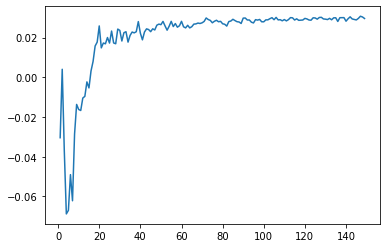

In [30]:
x = [i for i in range(1,150)]
y = []
for i in range(len(x)):
    method = manifold.MDS(10, max_iter=x[i], n_init=4,n_jobs=-1, dissimilarity= 'precomputed')
    Y2 = method.fit_transform(Y)
    y.append(numpy.mean(sklearn.metrics.pairwise_distances(Y2) - Y))
plt.plot(x,y)
plt.show()

### Зависимость от размера изначального датасета слов свободной группы

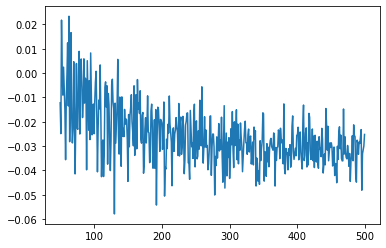

In [31]:
x = [i for i in range(50, 500)]
y = []
for k in range(50, 500):
    dataset = [group_dataset.__getitem__(i) for i in range(k)]
    Y = pairwise_distances(numpy.array(dataset,dtype=object))
    method = manifold.MDS(10, max_iter=200, n_init=4, n_jobs=-1,dissimilarity= 'precomputed')
    Y2 = method.fit_transform(Y)
    y.append(numpy.mean(sklearn.metrics.pairwise_distances(Y2) - Y))
plt.plot(x,y)
plt.show()

### Зависимость от кол-ва разных запусков SMACOF

In [32]:
dataset = [group_dataset.__getitem__(i) for i in range(50)]
Y = pairwise_distances(numpy.array(dataset,dtype=object))

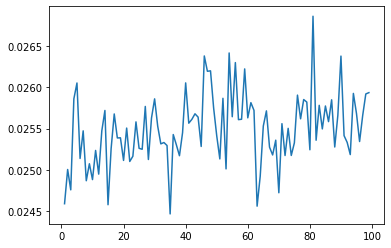

In [33]:
x = [i for i in range(1,100)]
y = []
for i in range(len(x)):
    method = manifold.MDS(10, n_init=x[i],n_jobs=-1, dissimilarity= 'precomputed')
    Y2 = method.fit_transform(Y)
    y.append(numpy.mean(sklearn.metrics.pairwise_distances(Y2) - Y))
plt.plot(x,y)
plt.show()